In [2]:
# Import relevant modules
%pylab inline
import numpy
import scipy.optimize
import scipy.stats
import matplotlib.ticker as ticker

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Let's use this value to generate (homoscedastic) error-bars for mass: you may want to modify this value.
intensity_error = 0.002 # g
initial = numpy.array([3.5, 0.0,0.0]) # Initial guess for fit parameters
'''
1 g sugar:100g water | first solution (called oneperc)
5 g sugar:100g water | first solution (called fiveperc)
Temperature = 22.0 degrees celcius
Wavelength = 
Length of tube = 44.6 cm''';

In [4]:
def conc(masssugar):
    return masssugar/0.4

In [5]:
def Analyse(file):
    data = numpy.loadtxt(file)
    xval = numpy.zeros(len(data))
    yval = numpy.zeros(len(data))
    yerr = numpy.zeros(len(data))
    for i in range(len(data)):
        xval[i] = numpy.array(data[i,0])
        yval[i] = numpy.array(data[i,1])
        yerr = intensity_error*numpy.ones(len(data))
    #print('Angle (degrees) = ', xval)                                     # Output time and mass data in suitable format
    #print('Intensity (V) = ', yval)
    #print('Intensity Error (V) = ', yerr, '\n') # Output error-bars for mass in suitable format
    return xval, yval, yerr

In [6]:
# Define the functional form of the model: vals is a numpy array holding the parameter values
def model_funct(x, vals):
    return vals[0]*numpy.cos(numpy.radians(x+vals[1]))**2 + vals[2]

In [7]:
# define initial values for fitting parameters and calculate degrees of freedom
def DoF(xval):
    deg_freedom = xval.size - initial.size # Make sure you understand why!
    return print('DoF = {}'.format(deg_freedom))

In [8]:
# define initial values for fitting parameters and calculate degrees of freedom
def DoF_File(file):
    
    xval, yval, yerr = Analyse(file)
    
    deg_freedom = xval.size - initial.size # Make sure you understand why!
    return print('DoF = {}'.format(deg_freedom))

In [9]:
def chisq(modelparams, x_data, y_data, y_err):
    chisqval=0
    for i in range(len(x_data)): #This was changed from xval  (didnt work) to xval1 (did work for data1) to x_data(seems to work)
        chisqval += ((y_data[i] - model_funct(x_data[i], modelparams))/y_err[i])**2
    return chisqval

In [10]:
# Produce a fit using the scipy optimize sub-module: 
# chisq is the function to be minimised - defined above, in this case giving chi-squared
# initial is a numpy array containing the initial 'guessed' values of the parameters - defined above
# args are additional arguments to pass to the chisq function after the array of parameters - in this case the data.
#
# There are many additional options that can be passed to the minimize function; see the scipy documentation - these are 
# not required for the simple case here, but may be for more complex data. You will learn about how several of them work 
# during your Computational Physics course.
def ChisqMin(xval,yval,yerr):
    fit = scipy.optimize.minimize(chisq, initial, args=(xval, yval, yerr))

# Termination output message is fit.message - did the minimisation complete successfully?
    print(fit.message)

# Resulting best fit parameter array is output as fit.x
    a_soln = fit.x[0]
    b_soln = fit.x[1]
    c_soln = fit.x[2]
    
    if a_soln <0:
        a_soln = abs(a_soln)
        b_soln = -(90-b_soln)
        c_soln = c_soln-a_soln
    
    print('best fit I = {} (V)'.format(a_soln))
    print('best fit Phase Dif = {} (degrees)'.format(b_soln)) #check this
    print('best fit background light = {} (V)'.format(c_soln))
    
# minimized value for chisq function is fit.fun
    #print('minimised chi-squared = {}'.format(fit.fun))
    return a_soln, b_soln, c_soln;
    
# Take a moment at this point to think about significant figures...

In [11]:
# Produce a fit using the scipy optimize sub-module: 
# chisq is the function to be minimised - defined above, in this case giving chi-squared
# initial is a numpy array containing the initial 'guessed' values of the parameters - defined above
# args are additional arguments to pass to the chisq function after the array of parameters - in this case the data.
#
# There are many additional options that can be passed to the minimize function; see the scipy documentation - these are 
# not required for the simple case here, but may be for more complex data. You will learn about how several of them work 
# during your Computational Physics course.
def ChisqMinFile(file):
    
    xval, yval, yerr = Analyse(file)
    
    fit = scipy.optimize.minimize(chisq, initial, args=(xval, yval, yerr))

# Termination output message is fit.message - did the minimisation complete successfully?
    #print(fit.message)

# Resulting best fit parameter array is output as fit.x
    a_soln = fit.x[0]
    b_soln = fit.x[1]
    c_soln = fit.x[2]
    
    if a_soln <0:
        a_soln = abs(a_soln)
        b_soln = -(90-b_soln)
        c_soln = c_soln-a_soln
    
    '''
    print(file)
    print('best fit I = {} (V)'.format(a_soln))
    print('best fit Phase Dif = {} (degrees)'.format(b_soln)) #check this
    print('best fit background light = {} (V)'.format(c_soln))

# minimized value for chisq function is fit.fun
    print('minimised chi-squared = {}'.format(fit.fun))
    '''
    return a_soln, b_soln, c_soln;
    
# Take a moment at this point to think about significant figures...

In [12]:
from matplotlib import gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
def reportgraph(xval,yval, yerr):
    fig = plt.figure()
    grid = gridspec.GridSpec(8,5)

    #Main plot
    main = pyplot.subplot(grid[:6,:4])
    main.errorbar(xval, yval, yerr=yerr, linestyle='None', marker = '+', capsize = 0.02, color='k') # Plot points
    main.set_ylabel('Intensity(V)')
    main.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    
    a_soln, b_soln, c_soln = ChisqMin(xval,yval,yerr) #Obtaining paramaters from chi_squared fit.
    
    #Plotting fit line from Chi_squared paramaters
    fit_line=model_funct(xval, [a_soln, b_soln, c_soln])
    main.plot(xval, fit_line, 'b')
    
    #Defining residuals and standard deviation of residuals.
    Residuals = -(a_soln*numpy.cos(numpy.radians(xval+b_soln))**2 + c_soln - yval) 
    Res_st_dev = numpy.std(Residuals, out=None, ddof=1)
    
    #Residual Graph
    res = pyplot.subplot(grid[6:8,:4],sharex=main)
    xlim1,xlim2  = 0, xval[-1]+5
    ylim1,ylim2  = min(min(Residuals),-2*Res_st_dev),max(max(Residuals),2*Res_st_dev)
    res.set_xlim(xlim1, xlim2)
    res.set_ylim(ylim1,ylim2)
    res.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    res.fill_between([xlim1,xlim2],-Res_st_dev,Res_st_dev,color = 'lightgrey')
    res.set_xlabel('Angle (degrees)')
    res.set_ylabel('Residuals')
    
    #Plotting Residuals
    res.scatter(xval, Residuals, marker = 'x',color='b')



    #Plot histogram of residuals
    his = pyplot.subplot(grid[6:8,4:],sharey = res)
    binlocations = numpy.linspace(ylim1,ylim2,10)
    his.hist(Residuals,bins = binlocations, orientation = 'horizontal',color = 'lightgrey',edgecolor='black', linewidth=1.0)
    his.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both',labelleft = False)
    #his.xticks(numpy.arange(1,5), numpy.arange(1,5))
    #his.set_xticks(numpy.arange(0,5))
    his.set_xlabel('Occurences')

    minor_locator1 = AutoMinorLocator(2)
    res.xaxis.set_minor_locator(minor_locator1)
    main.xaxis.set_minor_locator(minor_locator1)
    minor_locator2 = AutoMinorLocator(2)
    res.yaxis.set_minor_locator(minor_locator2)
    minor_locator3= AutoMinorLocator(2)
    main.yaxis.set_minor_locator(minor_locator3)


    fig.subplots_adjust(hspace=0,wspace = 0.05)
    print(fig);


In [13]:
from matplotlib import gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
def ReportGraphFile(file):
    fig = plt.figure()
    grid = gridspec.GridSpec(8,5)

    xval, yval, yerr = Analyse(file)
    
    #Main plot
    main = pyplot.subplot(grid[:6,:4])
    main.errorbar(xval, yval, yerr=yerr, linestyle='None', marker = '', capsize = 0.02, color='k') # Plot points
    main.set_ylabel('Intensity(V)')
    main.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    
    a_soln, b_soln, c_soln = ChisqMin(xval,yval,yerr) #Obtaining paramaters from chi_squared fit.
    
    #Plotting fit line from Chi_squared paramaters
    fit_line=model_funct(xval, [a_soln, b_soln, c_soln])
    main.plot(xval, fit_line, 'b')
    
    #Defining residuals and standard deviation of residuals.
    Residuals = -(a_soln*numpy.cos(numpy.radians(xval+b_soln))**2 + c_soln - yval)
    Res_st_dev = numpy.std(Residuals, out=None, ddof=1)
    
    #Residual Graph
    res = pyplot.subplot(grid[6:8,:4],sharex=main)
    xlim1,xlim2  = 0, xval[-1]+5
    ylim1,ylim2  = min(min(Residuals),-2*Res_st_dev),max(max(Residuals),2*Res_st_dev)
    #ylim1,ylim2 = -0.01,0.01
    res.set_xlim(xlim1, xlim2)
    res.set_ylim(ylim1,ylim2)
    res.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    res.fill_between([xlim1,xlim2],-Res_st_dev,Res_st_dev,color = 'lightgrey')
    res.set_xlabel('Angle (degrees)')
    res.set_ylabel('Residuals')
    
    #Plotting Residuals
    res.scatter(xval, Residuals, marker = '.',color='b')


    
    #Plot histogram of residuals
    his = pyplot.subplot(grid[6:8,4:],sharey = res)
    binlocations = numpy.linspace(ylim1,ylim2,10)
    his.hist(Residuals,bins = binlocations, orientation = 'horizontal',color = 'lightgrey',edgecolor='black', linewidth=1.0)
    his.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both',labelleft = False)
    #his.xticks(numpy.arange(1,5), numpy.arange(1,5))
    #his.set_xticks(numpy.arange(0,5))
    his.set_xlabel('Occurences')

    minor_locator1 = AutoMinorLocator(2)
    res.xaxis.set_minor_locator(minor_locator1)
    main.xaxis.set_minor_locator(minor_locator1)
    minor_locator2 = AutoMinorLocator(2)
    res.yaxis.set_minor_locator(minor_locator2)
    minor_locator3= AutoMinorLocator(2)
    main.yaxis.set_minor_locator(minor_locator3)
    

    fig.subplots_adjust(hspace=0,wspace = 0.05)
    print(fig);


Desired error not necessarily achieved due to precision loss.
best fit I = 2.8660194580734686 (V)
best fit Phase Dif = -129.17132626280755 (degrees)
best fit background light = 0.01544388957289966 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 2.846289410221692 (V)
best fit Phase Dif = -129.08756655302844 (degrees)
best fit background light = 0.01590374302557951 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.004530857426497545 (V)
best fit Phase Dif = -106.78281181554644 (degrees)
best fit background light = 1.388589058163244 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 2.836179414454323 (V)
best fit Phase Dif = -129.10475101150405 (degrees)
best fit background light = 0.018209250838070012 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.9159743238567238 (V)
best fit Phase Dif = -129.278000635

OSError: empty.data not found.

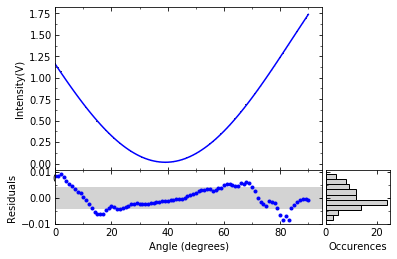

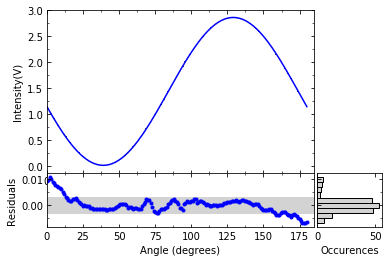

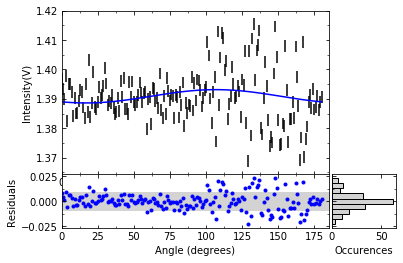

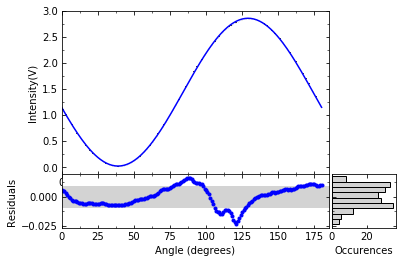

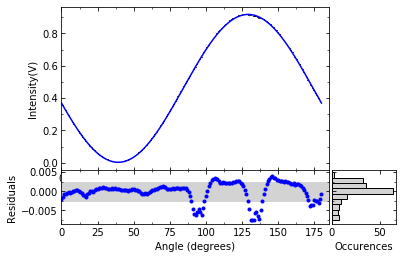

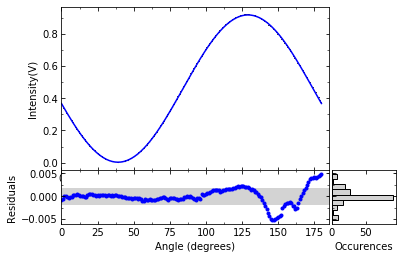

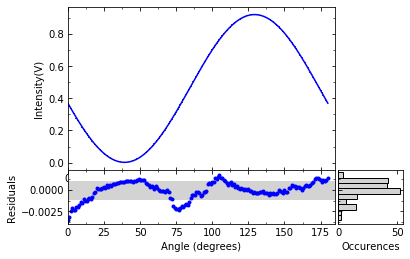

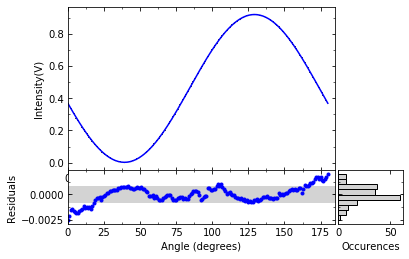

<Figure size 432x288 with 0 Axes>

In [69]:

ReportGraphFile('output.dat')
ReportGraphFile('output2.dat')
ReportGraphFile('output3.dat')
ReportGraphFile('output4.dat')
ReportGraphFile('output5.dat')
ReportGraphFile('output6.dat')
ReportGraphFile('output7.dat')
ReportGraphFile('output8.dat')
ReportGraphFile('empty.data')
ReportGraphFile('empty2.data')
ReportGraphFile('onepercsugar.dat')
ReportGraphFile('onepercsugar2.dat')
ReportGraphFile('onepercsugar3.dat')
ReportGraphFile('fivepercsugar.dat')
ReportGraphFile('fivepercsugar2.dat')
ReportGraphFile('fivepercsugar3.dat')
;

Desired error not necessarily achieved due to precision loss.
best fit I = 0.6519346328348573 (V)
best fit Phase Dif = -124.22918948436467 (degrees)
best fit background light = 0.0032645218859435055 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.6498718241378364 (V)
best fit Phase Dif = -124.03928353231208 (degrees)
best fit background light = 0.0038556642541432984 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.6152927307663887 (V)
best fit Phase Dif = -117.09071209556481 (degrees)
best fit background light = 0.00261822196506889 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.62131034172401 (V)
best fit Phase Dif = -117.21084200731275 (degrees)
best fit background light = 0.001196276019396092 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 0.6160646893010763 (V)
best fit Phase Dif = -117.07558

''

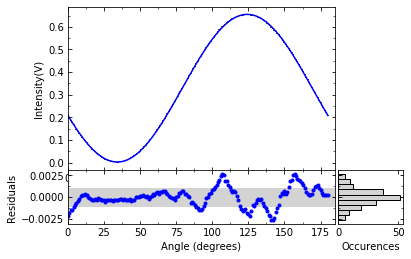

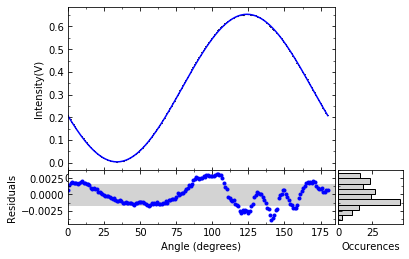

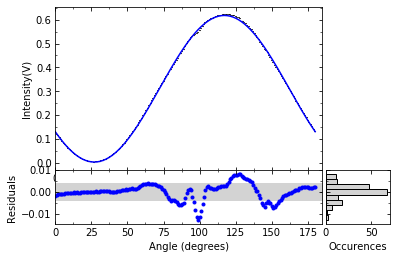

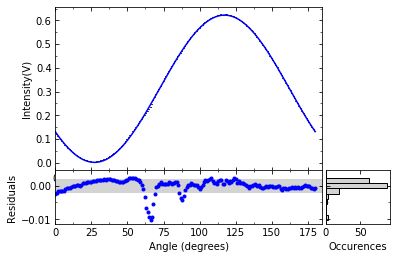

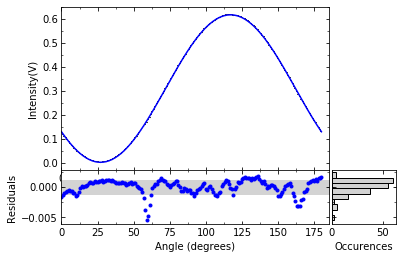

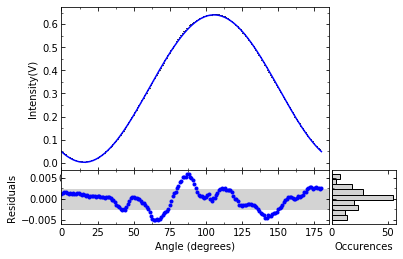

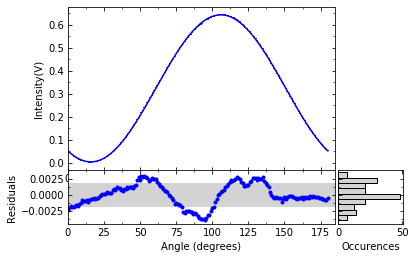

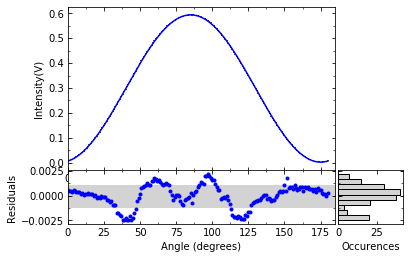

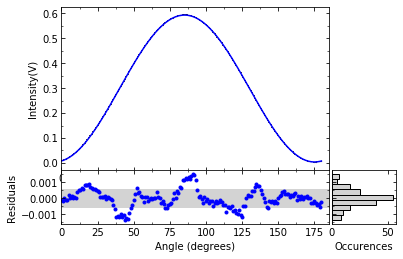

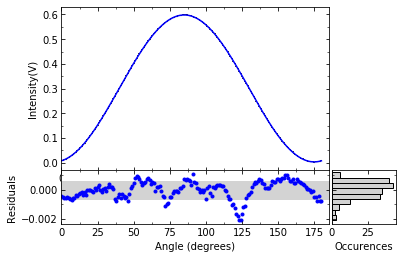

In [68]:
ReportGraphFile('twopercsugar.dat')
ReportGraphFile('twopercsugar2.dat')
ReportGraphFile('fivepercsugar.dat')
ReportGraphFile('fivepercsugar2.dat')
ReportGraphFile('fivepercsugar3.dat')
ReportGraphFile('tenpercsugar.dat')
ReportGraphFile('tenpercsugar2.dat')
ReportGraphFile('twentypercsugar.dat')
ReportGraphFile('twentypercsugar2.dat')
ReportGraphFile('twentypercsugar3.dat')
;

Desired error not necessarily achieved due to precision loss.
best fit I = 1.8906480126467156 (V)
best fit Phase Dif = -67.59655021242531 (degrees)
best fit background light = 0.45334539307062927 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 1.9232852437113162 (V)
best fit Phase Dif = -67.63809301690499 (degrees)
best fit background light = 0.45471472341855734 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 1.4667267661118115 (V)
best fit Phase Dif = -96.58124776216445 (degrees)
best fit background light = 0.023549976066878697 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 1.481149237745786 (V)
best fit Phase Dif = -96.44076663695031 (degrees)
best fit background light = 0.02427129609689138 (V)
Figure(432x288)
Desired error not necessarily achieved due to precision loss.
best fit I = 2.467906498295109 (V)
best fit Phase Dif = -47.61352777841357

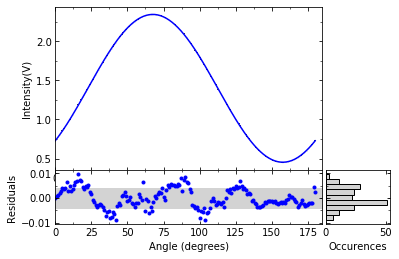

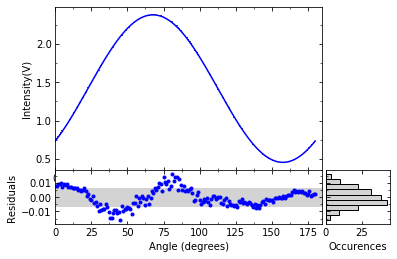

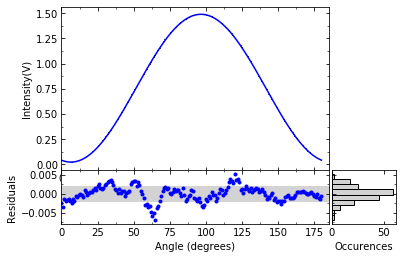

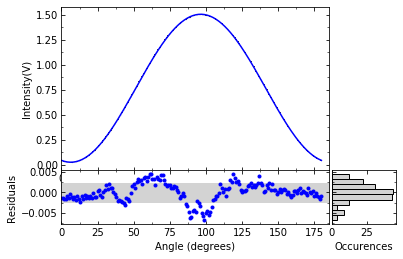

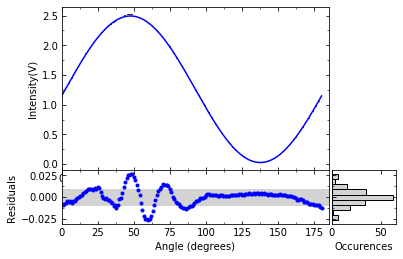

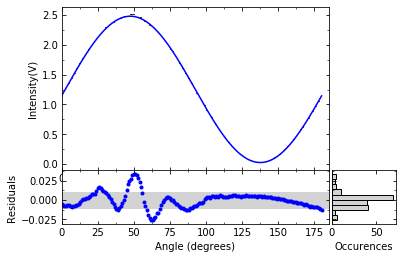

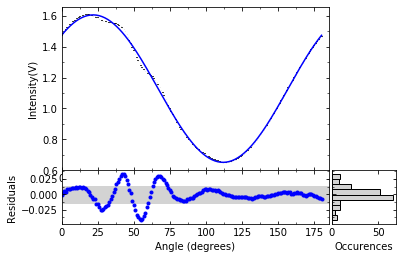

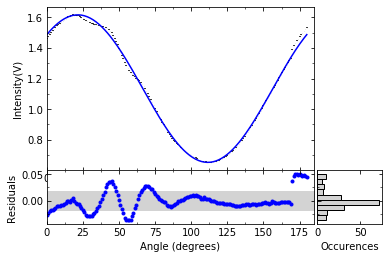

In [71]:
ReportGraphFile('lambda445nmoneperc.dat')
ReportGraphFile('lambda445nmoneperc2.dat')
ReportGraphFile('lambda650nmoneperc.dat')
ReportGraphFile('lambda650nmoneperc2.dat')
ReportGraphFile('lambda780nmoneperc.dat')
ReportGraphFile('lambda780nmoneperc2.dat')
ReportGraphFile('lambda850nmoneperc.dat')
ReportGraphFile('lambda850nmoneperc2.dat')

In [17]:
'''
ReportGraphFile('zeropercsugar.dat')
ReportGraphFile('zeropercsugar2.dat')
ReportGraphFile('lambda650water.dat')
ReportGraphFile('water 850.dat')
ReportGraphFile('water.dat')
ReportGraphFile('water445.dat')
''';

In [18]:
'''
ReportGraphFile('lambda445nmfiveperc.dat')
ReportGraphFile('lambda445nmfiveperc2.dat')
ReportGraphFile('lambda445nmtenperc.dat')
ReportGraphFile('lambda445nmtenperc2.dat')
ReportGraphFile('lambda445nmtwentyperc.dat')
ReportGraphFile('lambda445nmtwentyperc2.dat')
ReportGraphFile('lambda650nmfiveperc.dat')
ReportGraphFile('lambda650nmfiveperc2.dat')
ReportGraphFile('lambda650nmtenperc.dat')
ReportGraphFile('lambda650nmtenperc2.dat')
ReportGraphFile('lambda650nmtwentyperc.dat')
ReportGraphFile('lambda650nmtwentyperc2.dat')
''';

In [19]:
'''
ReportGraphFile('lambda780nmfiveperc.dat')
ReportGraphFile('lambda780nmfiveperc2.dat')
ReportGraphFile('lambda780nmtenperc.dat')
ReportGraphFile('lambda780nmtenperc2.dat')
ReportGraphFile('lambda780nmtwentyperc.dat')
#ReportGraphFile('lambda780nmtwentyperc2.dat')
ReportGraphFile('lambda850nmfiveperc.dat')
ReportGraphFile('lambda850nmfiveperc2.dat')
#ReportGraphFile('lambda850nmtenperc.dat')
#ReportGraphFile('lambda850nmtenperc2.dat')
#ReportGraphFile('lambda850nmtwentyperc.dat')
#ReportGraphFile('lambda850nmtwentyperc2.dat')
''';

In [20]:
'''ReportGraphFile('Empty10cm445.dat')
ReportGraphFile('Empty80cm445.dat')
ReportGraphFile('lambda980nmoneperc.dat')'''

"ReportGraphFile('Empty10cm445.dat')\nReportGraphFile('Empty80cm445.dat')\nReportGraphFile('lambda980nmoneperc.dat')"

In [21]:
def weighted_straight_fit(xval,yval,yerr):
    w = 1/yerr**2
    DeltaPrime = numpy.sum(w)*numpy.sum(w*xval**2)-numpy.sum(w*xval)**2
    m = (numpy.sum(w)*numpy.sum(w*xval*yval)-numpy.sum(w*xval)*numpy.sum(w*yval))/DeltaPrime
    c = (numpy.sum(w*xval**2)*numpy.sum(w*yval)-numpy.sum(w*xval)*numpy.sum(w*xval*yval))/DeltaPrime
    m_err = numpy.sqrt(numpy.sum(w)/DeltaPrime)
    c_err = numpy.sqrt(numpy.sum(w*xval**2)/DeltaPrime)
    return m, m_err, c, c_err

def model_funct_proportional(x, vals):
    return vals[0]*x

def chisqprop(modelparams, x_data, y_data, y_err):
    chisqval=0
    for i in range(len(x_data)): #This was changed from xval  (didnt work) to xval1 (did work for data1) to x_data(seems to work)
        chisqval += ((y_data[i] - model_funct_proportional(x_data[i], modelparams))/y_err[i])**2
    return chisqval

def ChisqMinProp(xval,yval,yerr):
    fit = scipy.optimize.minimize(chisqprop, initial, args=(xval, yval, yerr))

# Termination output message is fit.message - did the minimisation complete successfully?
    print(fit.message)

# Resulting best fit parameter array is output as fit.x
    a_soln = fit.x[0]
    
    print('best fit gradient = {} (some units)'.format(a_soln))

    
# minimized value for chisq function is fit.fun
    print('minimised chi-squared = {}'.format(fit.fun))
    return a_soln;

In [22]:
def observedrotation(Concs, Phases, Phase_error, Concs_error):
    fig = plt.figure()
    grid = gridspec.GridSpec(8,5)

    xval, yval, yerr, xerr = Concs, Phases, Phase_error, Concs_error
    
    
    #Main plot
    main = pyplot.subplot(grid[:6,:4])
    main.errorbar(xval, yval, yerr=10*yerr,xerr = 10*xerr, linestyle='None', marker = '.', capsize = 0.02, color='k') # Plot points
    main.set_ylabel('Observed rotation (degrees)')
    main.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    
    #m, m_err, c, c_err = weighted_straight_fit(xval,yval,yerr) #Obtaining paramaters from chi_squared fit.
    m = ChisqMinProp(xval,yval,yerr)
    #m = 52*10*0.446
    #Plotting fit line from Chi_squared paramaters
    fit_line=m*xval
    main.plot(xval, fit_line, 'b')
    
    #Defining residuals and standard deviation of residuals.
    Residuals = -(m*xval - yval)
    Res_st_dev = numpy.std(Residuals, out=None, ddof=1)
    
    #Residual Graph
    res = pyplot.subplot(grid[6:8,:4],sharex=main)
    xlim1,xlim2  = 0, xval[-1]
    #ylim1,ylim2  = min(min(Residuals),-2*Res_st_dev),max(max(Residuals),2*Res_st_dev)
    #ylim1,ylim2 = -0.01,0.01
    res.set_xlim(xlim1, xlim2)
    #res.set_ylim(ylim1,ylim2)
    res.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    res.fill_between([xlim1,xlim2],-Res_st_dev,Res_st_dev,color = 'lightgrey')
    res.set_xlabel('Concs (g/cm^3)')
    res.set_ylabel('Residuals')
    
    #Plotting Residuals
    res.scatter(xval, Residuals, marker = '.',color='b')


    '''
    #Plot histogram of residuals
    his = pyplot.subplot(grid[6:8,4:],sharey = res)
    binlocations = numpy.linspace(ylim1,ylim2,10)
    his.hist(Residuals,bins = binlocations, orientation = 'horizontal',color = 'lightgrey',edgecolor='black', linewidth=1.0)
    his.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both',labelleft = False)
    #his.xticks(numpy.arange(1,5), numpy.arange(1,5))
    #his.set_xticks(numpy.arange(0,5))
    his.set_xlabel('Occurences')
    '''
    minor_locator1 = AutoMinorLocator(2)
    res.xaxis.set_minor_locator(minor_locator1)
    main.xaxis.set_minor_locator(minor_locator1)
    minor_locator2 = AutoMinorLocator(2)
    res.yaxis.set_minor_locator(minor_locator2)
    minor_locator3= AutoMinorLocator(2)
    main.yaxis.set_minor_locator(minor_locator3)
    

    fig.subplots_adjust(hspace=0,wspace = 0.05)
    print(fig)
    specificrotation = m/(10*0.446)
    print('specific rotation = ',specificrotation)
    #print('gradient = ',m,'degrees*cm^3/g;   gradient error = ',m_err,';   intercept = ',c,';   intercept error = ',c_err,';   specific rotation = ',specificrotation);
    return specificrotation

In [23]:
Massreadingerror = 0.1*10**(-3)
W1 = 632.8
W2 = W1
files2 = ['zeropercsugar.dat','zeropercsugar2.dat','onepercsugar.dat','onepercsugar2.dat','onepercsugar3.dat','twopercsugar.dat','twopercsugar2.dat','fivepercsugar.dat','fivepercsugar2.dat','fivepercsugar3.dat','tenpercsugar.dat','tenpercsugar2.dat','twentypercsugar.dat','twentypercsugar2.dat','twentypercsugar3.dat']
Concs2 = numpy.array([conc(0),conc(0),conc(4/1000),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000),conc(20/1000),conc(40/1000),conc(40/1000),conc(80/1000),conc(80/1000),conc(80/1000)])
Phases2 = numpy.zeros(len(files2))
Phase_error2 = intensity_error*numpy.ones(len(Phases2))

for i, file in enumerate(files2):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases2[i] = PhaseDifference
print(Phases2)
print(Phase_error2)
print(Concs2)
Phases2 = Phases2-Phases2[0]

Phase_error2[0] = max(Phases2[0],Phases2[1])-min(Phases2[0],Phases2[1])
Phases2[0] = average([Phases2[0],Phases2[1]])

Phase_error2[2] = max(Phases2[2],Phases2[3],Phases2[4])-min(Phases2[2],Phases2[3],Phases2[4])
Phases2[2] = average([Phases2[2],Phases2[3],Phases2[4]])

Phase_error2[5] = max(Phases2[5],Phases2[6])-min(Phases2[5],Phases2[6])
Phases2[5] = average([Phases2[5],Phases2[6]])

Phase_error2[7] = max(Phases2[7],Phases2[8],Phases2[9])-min(Phases2[7],Phases2[8],Phases2[9])
Phases2[7] = average([Phases2[7],Phases2[8],Phases2[9]])

Phase_error2[10] = max(Phases2[10],Phases2[11])-min(Phases2[10],Phases2[11])
Phases2[10] = average([Phases2[10],Phases2[11]])

Phase_error2[12] = max(Phases2[12],Phases2[13],Phases2[14])-min(Phases2[12],Phases2[13],Phases2[14])
Phases2[12] = average([Phases2[12],Phases2[13],Phases2[14]])

Phases1 = numpy.ma.compressed(numpy.ma.array(Phases2, mask = [0, 1, 0,1,1,0,1,0,1,1,1,1,1,1,1]))
Concs1 = numpy.ma.compressed(numpy.ma.array(Concs2, mask = [0, 1, 0,1,1,0,1,0,1,1,1,1,1,1,1]))
Phase_error1 = numpy.ma.compressed(numpy.ma.array(Phase_error2, mask = [0, 1, 0,1,1,0,1,0,1,1,1,1,1,1,1]))

Phases2 = numpy.ma.compressed(numpy.ma.array(Phases2, mask = [0, 1, 0,1,1,0,1,0,1,1,0,1,0,1,1]))
Concs2 = numpy.ma.compressed(numpy.ma.array(Concs2, mask = [0, 1, 0,1,1,0,1,0,1,1,0,1,0,1,1]))
Phase_error2 = numpy.ma.compressed(numpy.ma.array(Phase_error2, mask = [0, 1, 0,1,1,0,1,0,1,1,0,1,0,1,1]))
Conc_error2 = (Massreadingerror/(0.4**2))*(1+(Concs2**2))**0.5/2

Conc_error2[1] = Conc_error2[1]*(2/3)
Conc_error2[3] = Conc_error2[3]*(2/3)
Conc_error2[-1] = Conc_error2[-1]*(2/3)
Conc_error1 = numpy.ma.compressed(numpy.ma.array(Conc_error2, mask = [0, 0, 0,0,1,1]))

print(Phases2)
print(Phase_error2)
print(Concs2)
assert(len(Concs2)==len(Phases2))
assert(len(Concs2)==len(Phase_error2))

[-129.35336678 -129.39580552 -126.86178702 -126.53088144 -126.70308664
 -124.22918948 -124.03928353 -117.0907121  -117.21084201 -117.07558993
 -105.60425388 -105.93407354  -85.08476672  -85.2101074   -84.98609816]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002]
[0.   0.   0.01 0.01 0.01 0.02 0.02 0.05 0.05 0.05 0.1  0.1  0.2  0.2
 0.2 ]
[-2.12193739e-02  2.65478174e+00  5.21913027e+00  1.22276521e+01
  2.35842031e+01  4.42597094e+01]
[0.04243875 0.33090558 0.18990595 0.13525208 0.32981965 0.22400924]
[0.   0.01 0.02 0.05 0.1  0.2 ]


In [24]:
W3 = 445
files3 = ['zeropercsugar.dat','zeropercsugar2.dat','water 850.dat','water.dat','water445.dat','lambda445nmoneperc.dat','lambda445nmoneperc2.dat','lambda445nmtwoperc.dat','lambda445nmtwoperc2.dat','lambda445nmfiveperc.dat','lambda445nmfiveperc2.dat','lambda445nmtenperc.dat','lambda445nmtenperc2.dat','lambda445nmtwentyperc.dat','lambda445nmtwentyperc2.dat']
Concs3 = numpy.array([conc(0),conc(0),conc(0),conc(0),conc(0),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000),conc(40/1000),conc(40/1000),conc(80/1000),conc(80/1000)])
Phases3 = numpy.zeros(len(files3))
Phase_error3 = intensity_error*numpy.ones(len(Phases3))
for i, file in enumerate(files3):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases3[i] = PhaseDifference
print(Phases3)
print(Phase_error3)
print(Concs3)

Phases3[5:9] = Phases3[5:9]-Phases3[0]
Phases3[:2] = Phases3[:2]-Phases3[0]
Phases3[9:] = Phases3[9:]-Phases3[2]
Phases3[2:5] = Phases3[2:5]-Phases3[2]

Phase_error3[0] = max(Phases3[0],Phases3[1],Phases3[2],Phases3[3],Phases3[4])-min(Phases3[0],Phases3[1],Phases3[2],Phases3[3],Phases3[4])
Phases3[0] = average([Phases3[0],Phases3[1],Phases3[2],Phases3[3],Phases3[4]])

Phase_error3[5] = max(Phases3[5],Phases3[6])-min(Phases3[5],Phases3[6])
Phases3[5] = average([Phases3[5],Phases3[6]])

Phase_error3[7] = max(Phases3[7],Phases3[8])-min(Phases3[7],Phases3[8])
Phases3[7] = average([Phases3[7],Phases3[8]])

Phase_error3[9] = max(Phases3[10],Phases3[9])-min(Phases3[10],Phases3[9])
Phases3[9] = average([Phases3[10],Phases3[9]])

Phase_error3[11] = max(Phases3[12],Phases3[11])-min(Phases3[12],Phases3[11])
Phases3[11] = average([Phases3[12],Phases3[11]])

Phase_error3[13] = max(Phases3[13],Phases3[14])-min(Phases3[13],Phases3[14])
Phases3[13] = average([Phases3[13],Phases3[14]])

#Phases3 = numpy.ma.compressed(numpy.ma.array(Phases3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Concs3 = numpy.ma.compressed(numpy.ma.array(Concs3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Phase_error3 = numpy.ma.compressed(numpy.ma.array(Phase_error3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))

Phases3 = numpy.ma.compressed(numpy.ma.array(Phases3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))
Concs3 = numpy.ma.compressed(numpy.ma.array(Concs3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))
Phase_error3 = numpy.ma.compressed(numpy.ma.array(Phase_error3, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))
Conc_error3 = (Massreadingerror/(0.4**2))*(1+(Concs3**2))**0.5/2

Conc_error3[0] = Conc_error3[0]*(2/5)

Phases3[-1] = Phases3[-1]+180
#Phases3[-2] = Phases3[-2]+180
#Phases3[3] = Phases3[3]+180

'''WHY IS THIS?'''
Phases3[1] = Phases3[1]-55
Phases3[2] = Phases3[2]-55

Phases3[2] = Phases3[2]-180

print(Phases3)
print(Phase_error3)
print(Concs3)
assert(len(Concs3)==len(Phases3))
assert(len(Concs3)==len(Phase_error3))

[-129.35336678 -129.39580552  -32.55387506  -32.55387506  -32.55387506
  -67.59655021  -67.63809302  117.40089612  117.24047421   -6.4008689
   -6.0671554    13.12863916   13.29630033 -107.37656841 -107.32979312]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.05 0.05 0.1  0.1  0.2
 0.2 ]
[-8.48774957e-03  6.73604516e+00  1.16740519e+01  2.63198629e+01
  1.05200694e+02]
[0.04243875 0.0415428  0.1604219  0.3337135  0.04677529]
[0.   0.01 0.02 0.05 0.2 ]


In [65]:
W4 = 650
files4 = ['zeropercsugar.dat','zeropercsugar2.dat','water 850.dat','water.dat','water445.dat','lambda650nmoneperc.dat','lambda650nmoneperc2.dat','lambda650nmtwoperc3.dat','lambda650nmtwoperc4.dat','lambda650nmfiveperc.dat','lambda650nmfiveperc2.dat','lambda650nmtenperc.dat','lambda650nmtenperc2.dat','lambda650nmtwentyperc.dat','lambda650nmtwentyperc2.dat']
Concs4 = numpy.array([conc(0),conc(0),conc(0),conc(0),conc(0),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000),conc(40/1000),conc(40/1000),conc(80/1000),conc(80/1000)])
Phases4 = numpy.zeros(len(files4))
Phase_error4 = intensity_error*numpy.ones(len(Phases4))
for i, file in enumerate(files4):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases4[i] = PhaseDifference
print(Phases4)
print(Phase_error4)
print(Concs4)
Phases4[5:9] = Phases4[5:9]-Phases4[0]
Phases4[:2] = Phases4[:2]-Phases4[0]
Phases4[9:] = Phases4[9:]-Phases4[2]
Phases4[2:5] = Phases4[2:5]-Phases4[2]

Phase_error4[0] = max(Phases4[0],Phases4[1],Phases4[2],Phases4[3],Phases4[4])-min(Phases4[0],Phases4[1],Phases4[2],Phases4[3],Phases4[4])
Phases4[0] = average([Phases4[0],Phases4[1],Phases4[2],Phases4[3],Phases4[4]])

Phase_error4[5] = max(Phases4[5],Phases4[6])-min(Phases4[5],Phases4[6])
Phases4[5] = average([Phases4[5],Phases4[6]])

Phase_error4[7] = max(Phases4[7],Phases4[8])-min(Phases4[7],Phases4[8])
Phases4[7] = average([Phases4[7],Phases4[8]])

Phase_error4[9] = max(Phases4[10],Phases4[9])-min(Phases4[10],Phases4[9])
Phases4[9] = average([Phases4[10],Phases4[9]])

Phase_error4[11] = max(Phases4[12],Phases4[11])-min(Phases4[12],Phases4[11])
Phases4[11] = average([Phases4[12],Phases4[11]])

Phase_error4[13] = max(Phases4[13],Phases4[14])-min(Phases4[13],Phases4[14])
Phases4[13] = average([Phases4[13],Phases4[14]])

#Phases4 = numpy.ma.compressed(numpy.ma.array(Phases4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Concs4 = numpy.ma.compressed(numpy.ma.array(Concs4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Phase_error4 = numpy.ma.compressed(numpy.ma.array(Phase_error4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))

Phases4 = numpy.ma.compressed(numpy.ma.array(Phases4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))
Concs4 = numpy.ma.compressed(numpy.ma.array(Concs4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))
Phase_error4 = numpy.ma.compressed(numpy.ma.array(Phase_error4, mask = [0, 1, 1,1,1,0,1,0,1,0,1,1,1,0,1]))

Conc_error4 = (Massreadingerror/(0.4**2))*(1+(Concs4**2))**0.5/2

Conc_error4[0] = Conc_error4[0]*(2/5)

#phases4[-1] = Phases4[-1]+180
#Phases4[-2] = Phases4[-2]+180
#hases4[3] = Phases4[3]+180
'''WHY IS THIS?'''
Phases4[1] = Phases4[1]-30

print(Phases4)
print(Phase_error4)
print(Concs4)
assert(len(Concs4)==len(Phases4))
assert(len(Concs4)==len(Phase_error4))

[-129.35336678 -129.39580552  -32.55387506  -32.55387506  -32.55387506
  -96.58124776  -96.44076664  -29.81899546  -30.12844509  -21.08267189
  -21.16886615  -15.53853875  -15.79845414   18.39285986   18.25548701]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.05 0.05 0.1  0.1  0.2
 0.2 ]
[-8.48774957e-03  2.84235958e+00  9.93796465e+01  1.14281060e+01
  5.08780485e+01]
[0.04243875 0.14048113 0.30944963 0.08619426 0.13737285]
[0.   0.01 0.02 0.05 0.2 ]


In [66]:
W5 = 780
files5 = ['zeropercsugar.dat','zeropercsugar2.dat','water 850.dat','water.dat','water445.dat','lambda780nmoneperc.dat','lambda780nmoneperc2.dat','lambda780nmtwoperc.dat','lambda780nmtwoperc2.dat','lambda780nmfiveperc.dat','lambda780nmfiveperc2.dat','lambda780nmtenperc.dat','lambda780nmtenperc2.dat','lambda780nmtwentyperc.dat','lambda780nmtwentyperc.dat']
Concs5 = numpy.array([conc(0),conc(0),conc(0),conc(0),conc(0),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000),conc(40/1000),conc(40/1000),conc(80/1000),conc(80/1000)])
Phases5 = numpy.zeros(len(files5))
Phase_error5 = intensity_error*numpy.ones(len(Phases5))
for i, file in enumerate(files5):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases5[i] = PhaseDifference
print(Phases5)
print(Phase_error5)
print(Concs5)
Phases5[5:9] = Phases5[5:9]-Phases5[0]
Phases5[:2] = Phases5[:2]-Phases5[0]
Phases5[9:] = Phases5[9:]-Phases5[2]
Phases5[2:5] = Phases5[2:5]-Phases5[2]

Phase_error5[0] = max(Phases5[0],Phases5[1],Phases5[2],Phases5[3],Phases5[4])-min(Phases5[0],Phases5[1],Phases5[2],Phases5[3],Phases5[4])
Phases5[0] = average([Phases5[0],Phases5[1],Phases5[2],Phases5[3],Phases5[4]])

Phase_error5[5] = max(Phases5[5],Phases5[6])-min(Phases5[5],Phases5[6])
Phases5[5] = average([Phases5[5],Phases5[6]])

Phase_error5[7] = max(Phases5[7],Phases5[8])-min(Phases5[7],Phases5[8])
Phases5[7] = average([Phases5[7],Phases5[8]])

Phase_error5[9] = max(Phases5[10],Phases5[9])-min(Phases5[10],Phases5[9])
Phases5[9] = average([Phases5[10],Phases5[9]])

Phase_error5[11] = max(Phases5[12],Phases5[11])-min(Phases5[12],Phases5[11])
Phases5[11] = average([Phases5[12],Phases5[11]])

Phase_error5[13] = max(Phases5[13],Phases5[14]+1)-min(Phases5[13],Phases5[14]+1) #'''MAKE SURE TO REMOVE THE +1'S!!'''
Phases5[13] = average([Phases5[13],Phases5[14]])

#Phases5 = numpy.ma.compressed(numpy.ma.array(Phases5, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Concs5 = numpy.ma.compressed(numpy.ma.array(Concs5, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Phase_error5 = numpy.ma.compressed(numpy.ma.array(Phase_error5, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))

Phases5 = numpy.ma.compressed(numpy.ma.array(Phases5, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))
Concs5 = numpy.ma.compressed(numpy.ma.array(Concs5, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))
Phase_error5 = numpy.ma.compressed(numpy.ma.array(Phase_error5, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))

Conc_error5 = Phase_error5/1000

#Phases5[-1] = Phases5[-1]+180
#Phases5[-2] = Phases5[-2]+180
#hases4[3] = Phases5[3]+180

print(Phases5)
print(Phase_error5)
print(Concs5)
assert(len(Concs5)==len(Phases5))
assert(len(Concs5)==len(Phase_error5))

[-129.35336678 -129.39580552  -32.55387506  -32.55387506  -32.55387506
  -47.61352778  -47.56025939  -46.28359339  -46.25799435  -24.3911928
  -24.65979302  -24.11561151  -24.11787354    6.20678398    6.20678398]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.05 0.05 0.1  0.1  0.2
 0.2 ]
[-8.48774957e-03  8.02838215e+00  8.43713254e+00  3.87606590e+01]
[0.04243875 0.26860022 0.00226203 1.        ]
[0.   0.05 0.1  0.2 ]


In [27]:
W6 = 850
files6 = ['zeropercsugar.dat','zeropercsugar2.dat','water 850.dat','water.dat','water445.dat','lambda850nmoneperc.dat','lambda850nmoneperc2.dat','lambda850nmtwoperc.dat','lambda850nmtwoperc2.dat','lambda850nmfiveperc.dat','lambda850nmfiveperc2.dat']
Concs6 = numpy.array([conc(0),conc(0),conc(0),conc(0),conc(0),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000)])
Phases6 = numpy.zeros(len(files6))
Phase_error6 = intensity_error*numpy.ones(len(Phases6))
for i, file in enumerate(files6):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases6[i] = PhaseDifference
print(Phases6)
print(Phase_error6)
print(Concs6)
Phases6[5:9] = Phases6[5:9]-Phases6[0]
Phases6[:2] = Phases6[:2]-Phases6[0]
Phases6[9:] = Phases6[9:]-Phases6[2]
Phases6[2:5] = Phases6[2:5]-Phases6[2]

Phase_error6[0] = max(Phases6[0],Phases6[1],Phases6[2],Phases6[3],Phases6[4])-min(Phases6[0],Phases6[1],Phases6[2],Phases6[3],Phases6[4])
Phases6[0] = average([Phases6[0],Phases6[1],Phases6[2],Phases6[3],Phases6[4]])

Phase_error6[5] = max(Phases6[5],Phases6[6])-min(Phases6[5],Phases6[6])
Phases6[5] = average([Phases6[5],Phases6[6]])

Phase_error6[7] = max(Phases6[7],Phases6[8])-min(Phases6[7],Phases6[8])
Phases6[7] = average([Phases6[7],Phases6[8]])

Phase_error6[9] = max(Phases6[10],Phases6[9])-min(Phases6[10],Phases6[9])
Phases6[9] = average([Phases6[10],Phases6[9]])
'''
Phase_error6[11] = max(Phases6[12],Phases6[11])-min(Phases6[12],Phases6[11])
Phases6[11] = average([Phases6[12],Phases6[11]])

Phase_error6[13] = max(Phases6[13],Phases6[14]+1)-min(Phases6[13],Phases6[14]+1) #MAKE SURE TO REMOVE THE +1'S!!

#Phases6 = numpy.ma.compressed(numpy.ma.array(Phases6, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Concs6 = numpy.ma.compressed(numpy.ma.array(Concs6, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))
#Phase_error6 = numpy.ma.compressed(numpy.ma.array(Phase_error6, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,1,0,1]))

Phases6 = numpy.ma.compressed(numpy.ma.array(Phases6, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))
Concs6 = numpy.ma.compressed(numpy.ma.array(Concs6, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))
Phase_error6 = numpy.ma.compressed(numpy.ma.array(Phase_error6, mask = [0, 1, 1,1,1,1,1,1,1,0,1,0,1,0,1]))

#Phases6[-1] = Phases6[-1]+180
#Phases6[-2] = Phases6[-2]+180
#hases4[3] = Phases6[3]+180
'''

Phases6 = numpy.ma.compressed(numpy.ma.array(Phases6, mask = [0, 1, 1,1,1,0,1,0,1,0,1]))
Concs6 = numpy.ma.compressed(numpy.ma.array(Concs6, mask = [0, 1, 1,1,1,0,1,0,1,0,1]))
Phase_error6 = numpy.ma.compressed(numpy.ma.array(Phase_error6, mask = [0, 1, 1,1,1,0,1,0,1,0,1]))
Conc_error6 = Phase_error6/1000
print(Phases6)
print(Phase_error6)
print(Concs6)
assert(len(Concs6)==len(Phases6))
assert(len(Concs6)==len(Phase_error6))

[-129.35336678 -129.39580552  -32.55387506  -32.55387506  -32.55387506
  -21.83826975  -21.47371091  -22.84590139  -22.81609102  -27.09733247
  -26.92346364]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.05 0.05]
[-8.48774957e-03  1.07697376e+02  1.06522371e+02  5.54347701e+00]
[0.04243875 0.36455884 0.02981037 0.17386883]
[0.   0.01 0.02 0.05]


In [53]:
W8 = 543
files8 = ['zeropercsugar.dat','zeropercsugar2.dat','water 850.dat','water.dat','water445.dat','lambda543nmoneperc.dat','lambda543nmoneperc2.dat','lambda543nmtwoperc.dat','lambda543nmtwoperc2.dat','lambda543nmfiveperc.dat','lambda543nmfiveperc2.dat','lambda543nmtenperc.dat','lambda543nmtenperc2.dat','lambda543nmtwentyperc.dat','lambda543nmtwentyperc.dat']
Concs8 = numpy.array([conc(0),conc(0),conc(0),conc(0),conc(0),conc(4/1000),conc(4/1000),conc(8/1000),conc(8/1000),conc(20/1000),conc(20/1000),conc(40/1000),conc(40/1000),conc(80/1000),conc(80/1000)])
Phases8 = numpy.zeros(len(files8))
Phase_error8 = intensity_error*numpy.ones(len(Phases8))
for i, file in enumerate(files8):
    Intensity,PhaseDifference, Offset = ChisqMinFile(file)
    #numpy.append(Phases,PhaseDifference)
    Phases8[i] = PhaseDifference
print(Phases8)
print(Phase_error8)
print(Concs8)
Phases8[5:9] = Phases8[5:9]-Phases8[0]
Phases8[:2] = Phases8[:2]-Phases8[0]
Phases8[9:] = Phases8[9:]-Phases8[2]
Phases8[2:5] = Phases8[2:5]-Phases8[2]

Phase_error8[0] = max(Phases8[0],Phases8[1],Phases8[2],Phases8[3],Phases8[4])-min(Phases8[0],Phases8[1],Phases8[2],Phases8[3],Phases8[4])
Phases8[0] = average([Phases8[0],Phases8[1],Phases8[2],Phases8[3],Phases8[4]])

Phase_error8[5] = max(Phases8[5],Phases8[6])-min(Phases8[5],Phases8[6])
Phases8[5] = average([Phases8[5],Phases8[6]])

Phase_error8[7] = max(Phases8[7],Phases8[8])-min(Phases8[7],Phases8[8])
Phases8[7] = average([Phases8[7],Phases8[8]])

Phase_error8[9] = max(Phases8[10],Phases8[9])-min(Phases8[10],Phases8[9])
Phases8[9] = average([Phases8[10],Phases8[9]])

Phases8 = numpy.ma.compressed(numpy.ma.array(Phases8, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,0,0,0]))
Concs8 = numpy.ma.compressed(numpy.ma.array(Concs8, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,0,0,0]))
Phase_error8 = numpy.ma.compressed(numpy.ma.array(Phase_error8, mask = [0, 1, 1,1,1,0,1,0,1,0,1,0,0,0,0]))
Conc_error8 = Phase_error8/1000
Phases8[1] = Phases8[1]-95
Phases8[2] = Phases8[2]-95
print(Phases8)
print(Phase_error8)
print(Concs8)
assert(len(Concs8)==len(Phases8))
assert(len(Concs8)==len(Phase_error8))

[-129.35336678 -129.39580552  -32.55387506  -32.55387506  -32.55387506
  -30.92500146  -30.93295037  -28.05361526  -28.41674857  -18.07063679
  -18.11441374   -2.32381063   -2.42288967   26.28114282   26.28114282]
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.05 0.05 0.1  0.1  0.2
 0.2 ]
[-8.48774957e-03  3.42439086e+00  6.11818487e+00  1.44613498e+01
  3.02300644e+01  3.01309854e+01  5.88350179e+01  5.88350179e+01]
[0.04243875 0.00794891 0.36313331 0.04377695 0.002      0.002
 0.002      0.002     ]
[0.   0.01 0.02 0.05 0.1  0.1  0.2  0.2 ]


Optimization terminated successfully.
best fit gradient = 245.9053547290373 (some units)
minimised chi-squared = 3.362382785897141
Figure(432x288)
specific rotation =  55.13572975987383
Optimization terminated successfully.
best fit gradient = 226.11215307066973 (some units)
minimised chi-squared = 88.77911092203576
Figure(432x288)
specific rotation =  50.6977921683116
Optimization terminated successfully.
best fit gradient = 526.5181199211095 (some units)
minimised chi-squared = 1309.2928041760351
Figure(432x288)
specific rotation =  118.05339011684069
Optimization terminated successfully.
best fit gradient = 258.91421060490524 (some units)
minimised chi-squared = 93025.6581609558
Figure(432x288)
specific rotation =  58.052513588543775
Optimization terminated successfully.
best fit gradient = 84.37491598276526 (some units)
minimised chi-squared = 680.213883278993
Figure(432x288)
specific rotation =  18.91814259703257
Optimization terminated successfully.
best fit gradient = 4525.47784

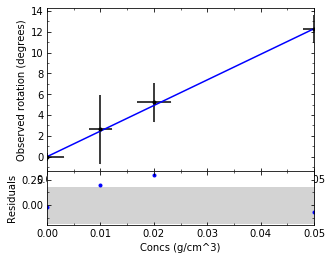

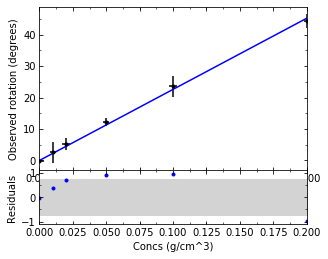

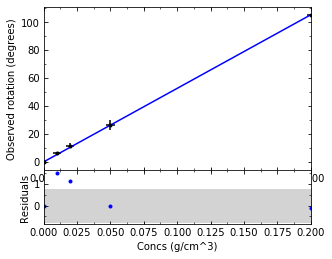

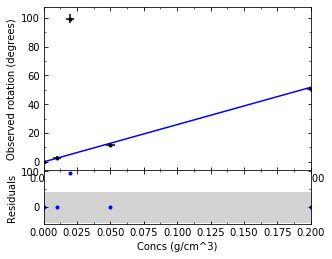

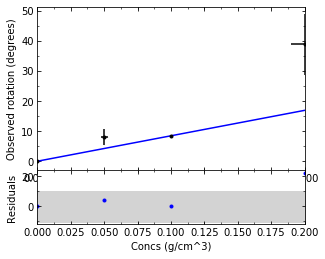

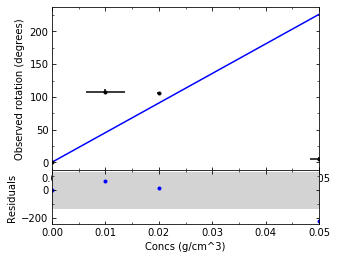

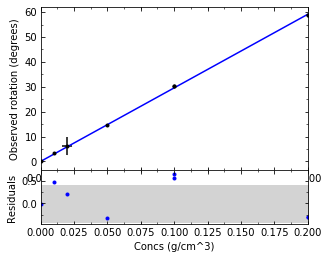

In [67]:
S1 = observedrotation(Concs1, Phases1, Phase_error1,Conc_error1)
S2 = observedrotation(Concs2, Phases2, Phase_error2,Conc_error2)
S3 = observedrotation(Concs3, Phases3, Phase_error3,Conc_error3)
S4 = observedrotation(Concs4, Phases4, Phase_error4,Conc_error4)
S5 = observedrotation(Concs5, Phases5, Phase_error5,Conc_error5)
S6 = observedrotation(Concs6, Phases6, Phase_error6,Conc_error6)
S8 = observedrotation(Concs8, Phases8, Phase_error8,Conc_error8)

#S1 = observedrotation(Phases1,Concs1, Conc_error1,Phase_error1)
#S2 = observedrotation( Phases2, Concs2,Conc_error2,Phase_error2)
#S3 = observedrotation( Phases3,Concs3,Conc_error3, Phase_error3)
#S4 = observedrotation(Phases4, Concs4, Conc_error4,Phase_error4)


In [55]:

OURWavelengths = numpy.array([W1,W2,W3,W4,W8])
OURSpecificRotation = numpy.array([S1,S2,S3,S4,S8])
SpecificRotationError = 1

'''LITERATURE ANALYSIS'''
Wavelengths = numpy.array([670.8,643.8,636.8,589.3,578.2,578.0,570.0,546.1,521.8,515.3,510.6,508.6,481.1,480.0,472.2,468.0,467.8,438.4,437.6,435.8,435.3,433.7,431.5,428.2,427.2,426.1,419.1,414.4,388.9,383.3,382.6])
SpecificRotation = numpy.array([50.51,55.04,56.51,66.45,69.10,69.22,71.24,78.16,86.21,88.68,90.46,91.16,103.07,103.62,107.38,109.49,109.69,126.5,127.2,128.49,128.5,129.8,130.7,133.6,134.2,134.9,140.0,144.2,166.7,171.8,173.1])
SpecificRotationError = 0.1*numpy.ones(len(SpecificRotation))

In [56]:
def ORD(Wavelengths, SpecificRotation, SpecificRotationError):
    fig = plt.figure()
    grid = gridspec.GridSpec(8,5)

    xval, yval, yerr = Wavelengths, SpecificRotation, SpecificRotationError
    
    #Main plot
    main = pyplot.subplot(grid[:6,:4])
    main.errorbar(xval, yval, yerr=yerr, linestyle='None', marker = '.', capsize = 0.02, color='k') # Plot points
    main.errorbar(OURWavelengths,OURSpecificRotation, linestyle='None', marker = '.', capsize = 0.02, color='r')
    main.set_ylabel('Specific rotation (deg./dm)')
    main.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    
    #m, m_err, c, c_err = weighted_straight_fit(xval,yval,yerr) #Obtaining paramaters from chi_squared fit.
    a_soln, b_soln = ChisqMinORD_DRUDE(xval,yval,yerr)
    
    fit_line=model_funct_DRUDE(xval, [a_soln, b_soln])
    main.plot(xval, fit_line, 'r')
    #Plotting fit line from Chi_squared paramaters
    #fit_line=m*xval+c
    #main.plot(xval, fit_line, 'b')
    
    a_solnC, b_solnC = ChisqMinORD_CAUCHY(xval,yval,yerr)
    
    fit_lineC=model_funct_CAUCHY(xval, [a_solnC, b_solnC])
    main.plot(xval, fit_lineC, 'b')

    #Defining residuals and standard deviation of residuals.
    ResidualsDRUDE = -(model_funct_DRUDE(xval, [a_soln, b_soln]) - yval)
    Res_st_dev = numpy.std(ResidualsDRUDE, out=None, ddof=1)
    
    #Defining residuals and standard deviation of residuals.
    ResidualsC = -(model_funct_CAUCHY(xval, [a_solnC, b_solnC]) - yval)
    Res_st_dev = numpy.std(ResidualsC, out=None, ddof=1)
    
    
    #Residual Graph
    res = pyplot.subplot(grid[6:8,:4],sharex=main)
    xlim1,xlim2  = 300, 700
    ylim1,ylim2  = min(min(ResidualsDRUDE),-2*Res_st_dev),max(max(ResidualsDRUDE),2*Res_st_dev)
    #ylim1,ylim2 = -0.01,0.01
    res.set_xlim(xlim1, xlim2)
    res.set_ylim(ylim1,ylim2)
    res.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both')
    res.fill_between([xlim1,xlim2],-Res_st_dev,Res_st_dev,color = 'lightgrey')
    res.set_xlabel('Wavelength (nm)')
    res.set_ylabel('Residuals')
    
    #Plotting Residuals
    res.scatter(xval, ResidualsDRUDE, marker = '.',color='r')
    res.scatter(xval, ResidualsC, marker = '.',color='b')


    
    #Plot histogram of residuals
    his = pyplot.subplot(grid[6:8,4:],sharey = res)
    binlocations = numpy.linspace(ylim1,ylim2,10)
    his.hist(ResidualsDRUDE,bins = binlocations, orientation = 'horizontal',color = 'lightgrey',edgecolor='black', linewidth=1.0)
    his.tick_params(axis='both', direction = 'in',top = True, right = True, which = 'both',labelleft = False)
    #his.xticks(numpy.arange(1,5), numpy.arange(1,5))
    #his.set_xticks(numpy.arange(0,5))
    his.set_xlabel('Occurences')

    minor_locator1 = AutoMinorLocator(2)
    res.xaxis.set_minor_locator(minor_locator1)
    main.xaxis.set_minor_locator(minor_locator1)
    minor_locator2 = AutoMinorLocator(2)
    res.yaxis.set_minor_locator(minor_locator2)
    minor_locator3= AutoMinorLocator(2)
    main.yaxis.set_minor_locator(minor_locator3)
    

    fig.subplots_adjust(hspace=0,wspace = 0.05)
    print(fig)
    print(len(xval)-2);

In [57]:
# Define the functional form of the model: vals is a numpy array holding the parameter values
def model_funct_DRUDE(x, vals):
    return vals[0]/(x**2-vals[1]**2)
def model_funct_CAUCHY(x, vals):
    return vals[0]+vals[1]/x**2

In [58]:
def chisqORD_DRUDE(modelparams, x_data, y_data, y_err):
    chisqval=0
    for i in range(len(x_data)): #This was changed from xval  (didnt work) to xval1 (did work for data1) to x_data(seems to work)
        chisqval += ((y_data[i] - model_funct_DRUDE(x_data[i], modelparams))/y_err[i])**2
    return chisqval
def chisqORD_CAUCHY(modelparams, x_data, y_data, y_err):
    chisqval=0
    for i in range(len(x_data)): #This was changed from xval  (didnt work) to xval1 (did work for data1) to x_data(seems to work)
        chisqval += ((y_data[i] - model_funct_CAUCHY(x_data[i], modelparams))/y_err[i])**2
    return chisqval

In [59]:
initial2 = numpy.array([24345518.9, 145.1]) # Initial guess for fit parameters
initial3 = numpy.array([-10.0, 26402071.1]) # Initial guess for fit parameters

In [60]:
def ChisqMinORD_DRUDE(xval,yval,yerr):
    fit = scipy.optimize.minimize(chisqORD_DRUDE, initial2, args=(xval, yval, yerr))

# Termination output message is fit.message - did the minimisation complete successfully?
    print(fit.message)

# Resulting best fit parameter array is output as fit.x
    a_soln = fit.x[0]
    b_soln = fit.x[1]
    #c_soln = fit.x[2]

    print('DRUDE numerator = {} (no idea units)'.format(a_soln))
    print('DRUDE wavelength = {} (nm)'.format(b_soln)) #check this
   # print('best fit background light = {} (V)'.format(c_soln))
    
# minimized value for chisq function is fit.fun
    print('DRUDE minimised chi-squared = {}'.format(fit.fun))
    
    return a_soln, b_soln;
    
def ChisqMinORD_CAUCHY(xval,yval,yerr):
    fit = scipy.optimize.minimize(chisqORD_CAUCHY, initial3, args=(xval, yval, yerr))

# Termination output message is fit.message - did the minimisation complete successfully?
    print(fit.message)

# Resulting best fit parameter array is output as fit.x
    a_soln = fit.x[0]
    b_soln = fit.x[1]
    #c_soln = fit.x[2]

    print('CAUCHY Vertical Displacement = {} (deg.dm)'.format(a_soln))
    print('CAUCHY wavelength coefficient = {} (no idea units)'.format(b_soln)) #check this
   # print('best fit background light = {} (V)'.format(c_soln))
    
# minimized value for chisq function is fit.fun
    print('CAUCHY minimised chi-squared = {}'.format(fit.fun))
    
    return a_soln, b_soln;

Desired error not necessarily achieved due to precision loss.
DRUDE numerator = 21675213.43710411 (no idea units)
DRUDE wavelength = 144.9662714816793 (nm)
DRUDE minimised chi-squared = 86.12006478518403
Desired error not necessarily achieved due to precision loss.
CAUCHY Vertical Displacement = -10.069544421316317 (deg.dm)
CAUCHY wavelength coefficient = 26402071.09999996 (no idea units)
CAUCHY minimised chi-squared = 3609.1995451333505
Figure(432x288)
29


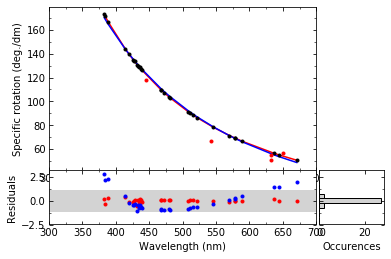

In [61]:
ORD(Wavelengths, SpecificRotation, SpecificRotationError)